In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid')

In [5]:
pak_data=pd.read_csv('Pakistan_Business_sales.csv')

In [6]:
pak_data.shape

(1000, 20)

In [7]:
pak_data.columns

Index(['Business_ID', 'Business_Name', 'City', 'Province', 'Business_Type',
       'Owner_Name', 'Year', 'Month', 'Product_Category', 'Units_Sold',
       'Unit_Price', 'Total_Sales', 'Discount_Applied', 'Net_Sales',
       'Payment_Method', 'Customer_Type', 'Employee_Count', 'Online_Sales',
       'Branch_Count', 'Profit'],
      dtype='object')

In [8]:
pak_data.head()

,Business_ID,Business_Name,City,Province,Business_Type,Owner_Name,Year,Month,Product_Category,Units_Sold,Unit_Price,Total_Sales,Discount_Applied,Net_Sales,Payment_Method,Customer_Type,Employee_Count,Online_Sales,Branch_Count,Profit
0,BIZ0001,Business_1,Quetta,Balochistan,Wholesale,Fatima,2023,10,Groceries,361,2220,801420,0,801420.00,Bank Transfer,Government,156,Yes,9,80334.72
1,BIZ0002,Business_2,Quetta,Balochistan,Wholesale,Ahmed,2024,8,Sports,467,2559,1195053,20,956042.40,Cash,Corporate,24,Yes,10,231162.30
2,BIZ0003,Business_3,Quetta,Balochistan,Wholesale,Ahmed,2020,1,Sports,396,4338,1717848,20,1374278.40,EasyPaisa,Corporate,133,Yes,6,317238.91
3,BIZ0004,Business_4,Rawalpindi,Punjab,E-commerce,Ayesha,2022,2,Electronics,151,239,36089,5,34284.55,Bank Transfer,Government,64,No,8,6159.98
4,BIZ0005,Business_5,Quetta,Islamabad Capital Territory,Manufacturing,Zeeshan,2025,12,Clothing,209,744,155496,5,147721.20,Bank Transfer,Individual,29,No,10,43069.13


In [9]:
#checking missing (null) values
null_counts = pak_data.isnull().sum()

In [10]:
null_counts

Business_ID         0
Business_Name       0
City                0
Province            0
Business_Type       0
Owner_Name          0
Year                0
Month               0
Product_Category    0
Units_Sold          0
Unit_Price          0
Total_Sales         0
Discount_Applied    0
Net_Sales           0
Payment_Method      0
Customer_Type       0
Employee_Count      0
Online_Sales        0
Branch_Count        0
Profit              0
dtype: int64

YEAR WISE SALES PRFORMANCE

In [60]:
'''About this fun: 
1- Year wise sales growth
'''
def sales_performance_analysis(pak_data):
    yearly_sales=pak_data.groupby('Year')['Total_Sales'].sum().reset_index()
    
    plt.figure()
    plt.plot(yearly_sales["Year"], yearly_sales["Total_Sales"], marker='o')
    plt.title("Year-wise Total Sales Trend")
    plt.xlabel("Year")
    plt.ylabel("Total Sales")
    plt.show()
    
    return yearly_sales
    


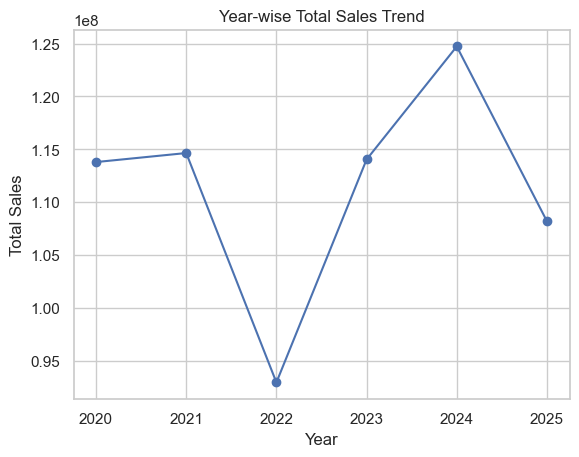

,Year,Total_Sales
0,2020,113799711
1,2021,114652465
2,2022,92962875
3,2023,114043947
4,2024,124729956
5,2025,108202908


In [61]:
sales_performance_analysis(pak_data)

PRODUCT + MOUNTH WISE SALE 

In [85]:
'''About this fun:
1-Mounthly sale of product'''

def mounthly_product_sales(pak_data):
    product_mounth_sale=pak_data.pivot_table(values='Total_Sales',index='Month',columns='Product_Category',aggfunc='sum')
    return product_mounth_sale

In [86]:
mounthly_product_sales(pak_data)

Product_Category,Books,Clothing,Cosmetics,Electronics,Furniture,Groceries,Sports
Month,,,,,,,
1,3676891,7576688,9661652,4812227,5727750,6301212,12046970
2,10478489,5466682,11620779,6668839,5897041,13039095,7677651
3,8502687,10223821,12897827,6251643,7260749,9415359,8447800
4,5205675,9045835,6665588,14816398,9094519,5044134,9633321
5,10256100,8957521,3378763,8884972,10961373,4539089,7472765
6,4950649,10098034,10076852,9128640,7492759,4964507,4402082
7,5146298,2188068,10622793,5790111,5720216,4661681,8338630
8,10486634,6857379,9947280,9988135,6518394,19595054,7138299
9,8987050,7366034,9979435,10588627,12405042,8580547,10573881


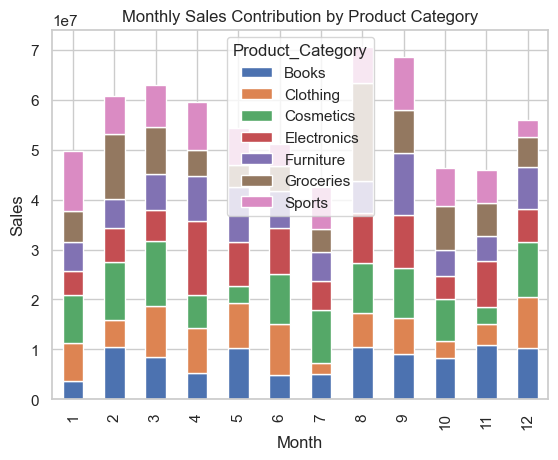

In [87]:
product_mounth_sale=mounthly_product_sales(pak_data)
product_mounth_sale.plot(kind='bar', stacked=True)
plt.title("Monthly Sales Contribution by Product Category")
plt.xlabel("Month")
plt.ylabel("Sales")
plt.show()

PROFITABILITY ANALYSIS

In [128]:
'''About this fun:
1-Profit trend over time
2-Profit comparison by business type'''

def profitability_analysis(pak_data):
    yearly_profit=pak_data.groupby('Year')['Profit'].sum().reset_index()
    
    #profit by business type
    business_profit=pak_data.groupby('Business_Type')['Profit'].mean()
    return yearly_profit,business_profit
    

In [129]:
result_of_yearly_profit=profitability_analysis(pak_data)[0]

In [130]:
result_of_yearly_profit

,Year,Profit
0,2020,20944083.14
1,2021,20866210.94
2,2022,16209654.06
3,2023,20072767.93
4,2024,22780430.44
5,2025,19341309.09


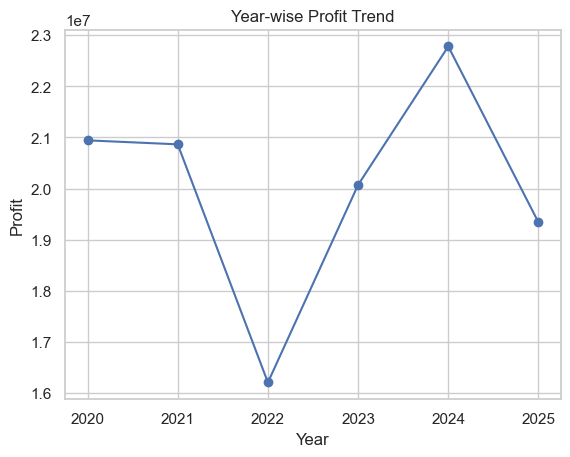

In [131]:
plt.figure()
plt.plot(result_of_yearly_profit['Year'],result_of_yearly_profit['Profit'], marker='o')
plt.title('Year-wise Profit Trend')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.show()

In [132]:
result_of_business_profit=profitability_analysis(pak_data)[1].to_frame()

In [133]:
result_of_business_profit.sort_values(by='Profit',ascending=False)

,Profit
Business_Type,
E-commerce,129373.482050
Retail,122407.921980
Wholesale,119434.854158
Manufacturing,115173.054236
Service,114546.053886


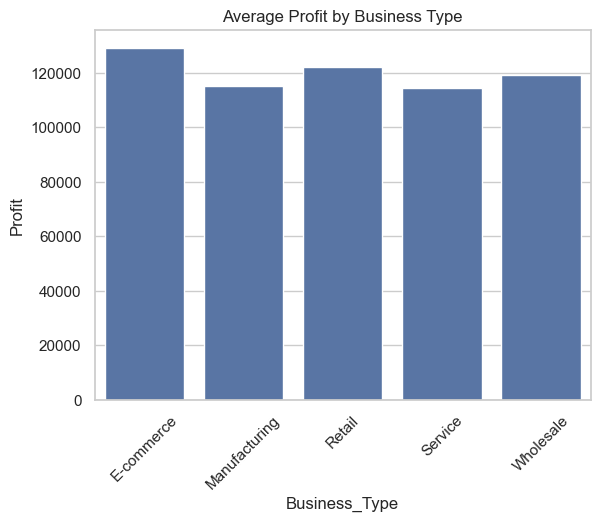

In [134]:
plt.figure()
sns.barplot(x='Business_Type',y='Profit',data=result_of_business_profit)
plt.title('Average Profit by Business Type')
plt.xticks(rotation=45)
plt.show()

PRODUCT CATECORY PERFORMANCE ANALYSIS

In [124]:
'''About this fun:
1-Most profitable categories
High volume vs low profit categories'''

def product_category_analysis(pak_data):
    category_profit = pak_data.groupby('Product_Category')['Profit'].sum()

    return category_profit 

In [135]:
result_of_product_category=product_category_analysis(pak_data).to_frame().sort_values(by='Profit',ascending=False)

In [136]:
result_of_product_category

,Profit
Product_Category,
Cosmetics,19954331.17
Groceries,17541104.50
Electronics,17471377.39
Books,17180206.92
Sports,16915248.26
Furniture,16470788.33
Clothing,14681399.03


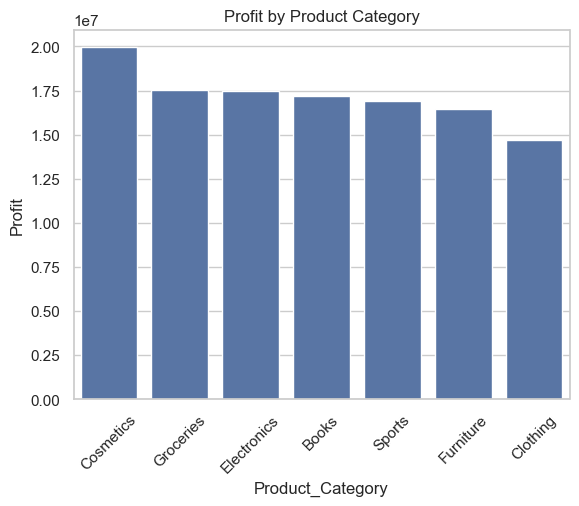

In [138]:
plt.figure()
sns.barplot(x='Product_Category', y='Profit', data=result_of_product_category)
plt.title('Profit by Product Category')
plt.xticks(rotation=45)
plt.show()

CITY AND PROVINCE WISE SALES

In [141]:
'''About this fun:
1-Top cities by sales
2-Province-wise contribution'''

def location_analysis(pak_data):
    city_sales = pak_data.groupby('City')['Total_Sales'].sum().sort_values(ascending=False).head(10)
    
    province_sales = pak_data.groupby('Province')['Total_Sales'].sum().reset_index()

    return  city_sales, province_sales

In [142]:
location_analysis(pak_data)[0].to_frame()

,Total_Sales
City,
Karachi,96915478
Faisalabad,95587723
Multan,94171791
Quetta,85876231
Lahore,81813671
Islamabad,79679519
Rawalpindi,70889376
Peshawar,63458073


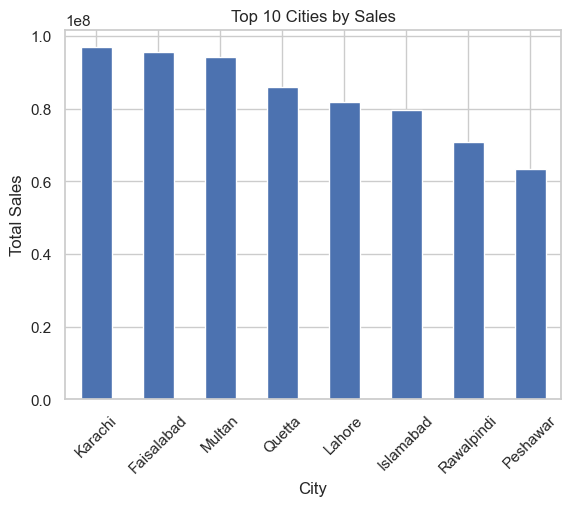

In [145]:
city_sales=location_analysis(pak_data)[0]
plt.figure()
city_sales.plot(kind='bar')
plt.title('Top 10 Cities by Sales')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [146]:
result_of_province_sales=location_analysis(pak_data)[1]

In [147]:
result_of_province_sales

,Province,Total_Sales
0,Balochistan,138197791
1,Islamabad Capital Territory,130864641
2,KPK,132277439
3,Punjab,134976608
4,Sindh,132075383


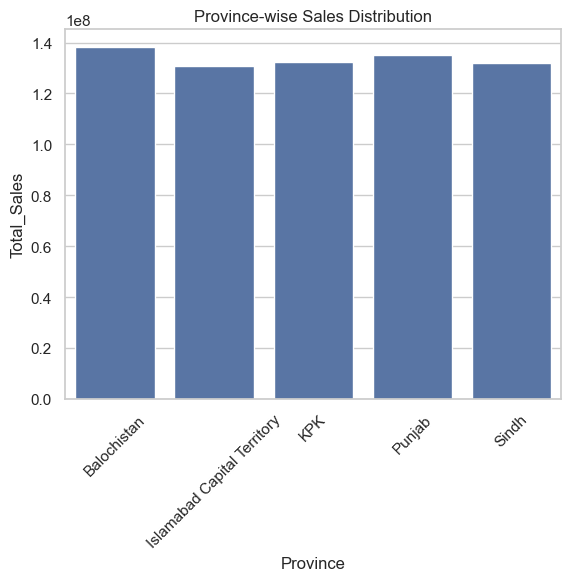

In [149]:
plt.figure()
sns.barplot(x='Province', y='Total_Sales', data=result_of_province_sales)
plt.title('Province-wise Sales Distribution')
plt.xticks(rotation=45)
plt.show()

DISCOUNT IMPACT ANALYSIS

In [154]:
'''Adout this fun:
1-Discount vs units sold
2-Discount vs profit'''

def discount_impact_analysis(pak_data):
    plot1=(plt.figure(),
    sns.scatterplot(x='Discount_Applied', y='Units_Sold', data=pak_data),
    plt.title('Discount vs Units Sold'),
    plt.show())
    
    plot2=(plt.figure(),
    sns.scatterplot(x='Discount_Applied', y='Profit', data=pak_data),
    plt.title('Discount vs Profit'),
    plt.show())

    return plot1,plot2

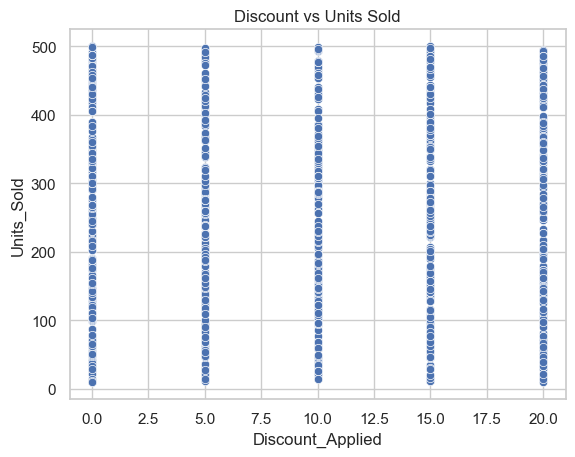

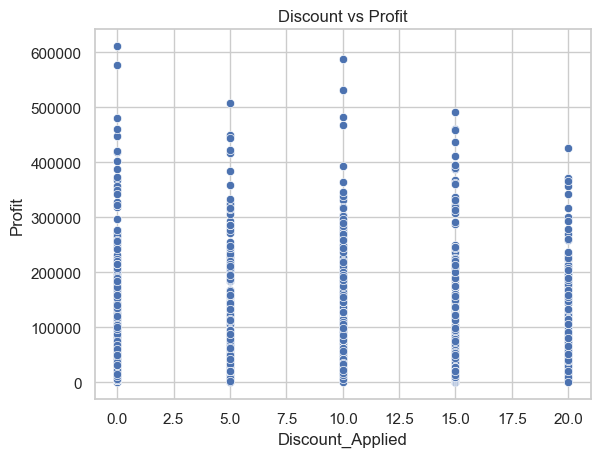

(<Figure size 640x480 with 1 Axes>,
 <Axes: title={'center': 'Discount vs Units Sold'}, xlabel='Discount_Applied', ylabel='Units_Sold'>,
 Text(0.5, 1.0, 'Discount vs Units Sold'),
 None)

In [157]:
discount_impact_analysis(pak_data)

CUSTOMER TYPE ANALYSIS

In [172]:
'''Adout this fun:
2-Profitability per customer type'''

def customer_type_analysis(pak_data):
    customer_profit = pak_data.groupby('Customer_Type')['Profit'].mean().sort_values(ascending=False)

    return customer_profit

In [181]:
result_of_customer_Profit=customer_type_analysis(pak_data).to_frame()

In [182]:
result_of_customer_Profit

,Profit
Customer_Type,
Government,126599.301708
Corporate,122472.832111
Individual,111828.619288


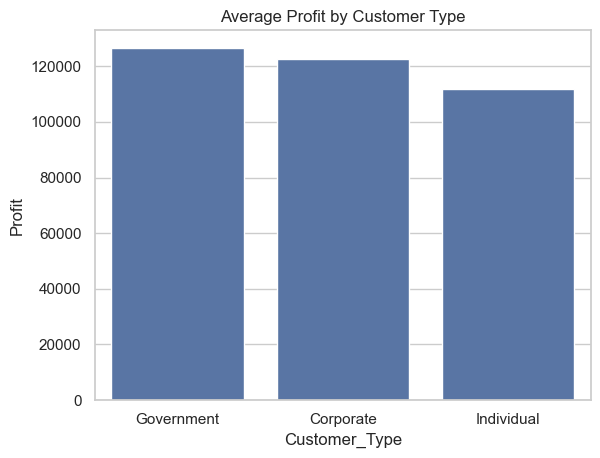

In [183]:
plt.figure()
sns.barplot(x='Customer_Type', y='Profit', data=result_of_customer_Profit)
plt.title('Average Profit by Customer Type')
plt.show()

ONLINE VS OFFLINE SALES

In [178]:
'''About this fun:
-Revenue contribution
-Profit comparison'''

def online_offline_analysis(pak_data):
    channel_sales = pak_data.groupby('Online_Sales')['Net_Sales'].sum()

    return channel_sales


In [192]:
result_of_channel_sales=online_offline_analysis(pak_data).to_frame()

In [193]:
result_of_channel_sales.sort_values(by='Net_Sales',ascending=False)

,Net_Sales
Online_Sales,
Yes,3.117287e+08
No,2.902635e+08


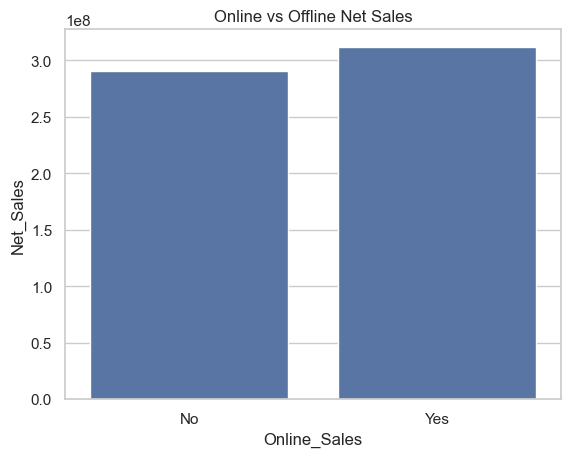

In [194]:
plt.figure()
sns.barplot(x='Online_Sales', y='Net_Sales', data=result_of_channel_sales)
plt.title('Online vs Offline Net Sales')
plt.show()

BUSINESS SCALE AND EFFICIENCY

In [202]:
'''About this fun:
1-Profit per employee
2-Profit per branch'''

def business_efficiency_analysis(pak_data):
    
    Profit_per_Employee = pak_data['Profit'] / pak_data['Employee_Count']
    Profit_per_Branch = pak_data['Profit'] / pak_data['Branch_Count']
    return Profit_per_Employee,Profit_per_Branch

In [205]:
business_efficiency_analysis(pak_data)[0].to_frame()

,0
0,514.966154
1,9631.762500
2,2385.254962
3,96.249687
4,1485.142414
...,...
995,207.142736
996,452.561633
997,2088.780833
998,261.194021


In [208]:
business_efficiency_analysis(pak_data)[0].max()

193926.24

In [216]:
business_efficiency_analysis(pak_data)[0].idxmax()

182

In [209]:
business_efficiency_analysis(pak_data)[0].min()

2.9947894736842104

In [217]:
business_efficiency_analysis(pak_data)[0].idxmin()

985

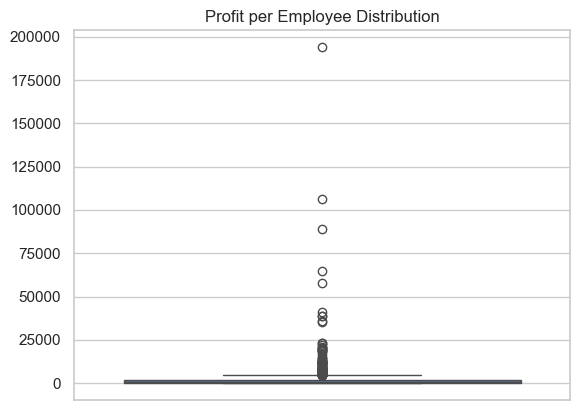

In [228]:
plt.figure()
sns.boxplot(business_efficiency_analysis(pak_data)[0])
plt.title('Profit per Employee Distribution')
plt.show()

In [198]:
business_efficiency_analysis(pak_data)[1].to_frame()

,0
0,8926.080000
1,23116.230000
2,52873.151667
3,769.997500
4,4306.913000
...,...
995,2744.641250
996,11087.760000
997,10026.148000
998,24682.835000


In [214]:
business_efficiency_analysis(pak_data)[1].max()

417813.62

In [213]:
business_efficiency_analysis(pak_data)[1].idxmax()

395

In [212]:
business_efficiency_analysis(pak_data)[1].min()

106.97

In [215]:
business_efficiency_analysis(pak_data)[1].idxmin()

421

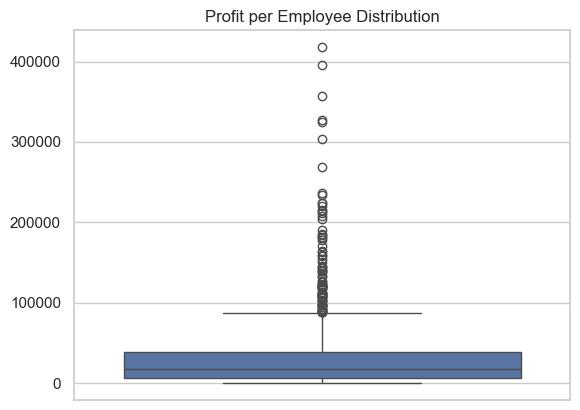

In [229]:
plt.figure()
sns.boxplot(business_efficiency_analysis(pak_data)[1])
plt.title('Profit per Employee Distribution')
plt.show()